# Data pre-processing

In [1]:
import os
import struct
import numpy as np
import time
import random
import csv

In [2]:
def load_data(path):
    data = csv.reader(open(path,'r'))
    labels=[]
    images=[]
    for item in data:
        labels.append(item[1])
        temp =list(map(int,item[2:]))
        images.append(temp)   
    # data[0] is the lable of each column
    # item[0] is the index of images
    # omit these 2 things 
    labels.pop(0)
    images.pop(0)
    return images,labels

In [3]:
# data path
training_data = 'trainData.csv'
test_data = 'testData.csv'

In [4]:
# loading in data
X_train,y_train = load_data(training_data)
X_test,y_test = load_data(test_data)

# Create model

In [5]:
from sklearn.svm import SVC

clf = SVC(C=100.0, kernel='poly', gamma=0.03)
clf.fit(X_train,y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# report the test result
Y_predict1 = clf.predict(X_train)
from sklearn.metrics import classification_report,precision_recall_fscore_support
print('In‐sample accuracy report:')
print(classification_report(Y_predict1, y_train, target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']),'\n')

In‐sample accuracy report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1000
          1       1.00      1.00      1.00      1000
          2       1.00      1.00      1.00      1000
          3       1.00      1.00      1.00      1000
          4       1.00      1.00      1.00      1000
          5       1.00      1.00      1.00      1000
          6       1.00      1.00      1.00      1000
          7       1.00      1.00      1.00      1000
          8       1.00      1.00      1.00      1000
          9       1.00      1.00      1.00      1000

avg / total       1.00      1.00      1.00     10000
 



In [11]:
Y_predict2 = clf.predict(X_test)
print('Out‐sample accuracy report:')
print(classification_report(Y_predict2, y_test, target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']),'\n')

Out‐sample accuracy report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       205
          1       0.97      0.97      0.97       201
          2       0.96      0.96      0.96       201
          3       0.94      0.95      0.94       198
          4       0.96      0.96      0.96       200
          5       0.95      0.97      0.96       196
          6       0.97      0.98      0.98       199
          7       0.96      0.96      0.96       200
          8       0.94      0.95      0.94       196
          9       0.95      0.93      0.94       204

avg / total       0.96      0.96      0.96      2000
 



# Select parameters 

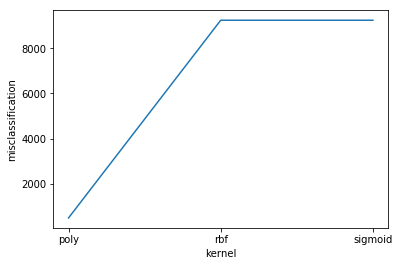

best score: 0.951000
best parameters:
kernel poly
test score: 0.961000


In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score
# Control the parameters

# Test the 'kernel'
parameters = {'kernel':['poly','rbf','sigmoid']}
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, y_train)
result = clf_new.best_estimator_

X = [parameters['kernel'][i] for i in range(3)]
Y = [(1 - clf_new.cv_results_['mean_test_score'][i]) * len(X_train) for i in range(3)]

# Show the test process
plt.plot(X,Y)
plt.xlabel('kernel')
plt.ylabel('misclassification')
plt.show()

print('best score: %f'%clf_new.best_score_)
for key in parameters.keys():
    temp = Y[0]
    for i in range(len(Y)-1):
        if Y[i] != Y[i+1]:
            temp = Y[i+1]
    if temp != Y[0]:
        print('best parameters:')
        print(key, result.get_params()[key])
    else:
        print('This parameter "kernel" do not have too much effect on the result.')
        print('best parameters:')
        print(key,X[-1])
print('test score: %f'%result.score(X_test, y_test))

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score

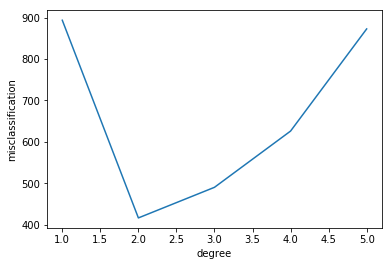

best score: 0.958400
best parameters:
kernel poly
best parameters:
degree 2
test score: 0.965000


In [7]:
# Test the 'degree'
parameters = {'kernel':['poly'],
              'degree':[1,2,3,4,5]}
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, y_train)
result = clf_new.best_estimator_
X = [parameters['degree'][i] for i in range(5)]
Y = [(1 - clf_new.cv_results_['mean_test_score'][i]) * len(X_train) for i in range(5)]

# Show the test process
plt.plot(X,Y)
plt.xlabel('degree')
plt.ylabel('misclassification')
plt.show()

print('best score: %f'%clf_new.best_score_)
for key in parameters.keys():
    temp = Y[0]
    for i in range(len(Y)-1):
        if Y[i] != Y[i+1]:
            temp = Y[i+1]
    if temp != Y[0]:
        print('best parameters:')
        print(key, result.get_params()[key])
    else:
        print('This parameter "degree" do not have too much effect on the result.')
        print('best parameters:')
        print(key,X[-1])
print('test score: %f'%result.score(X_test, y_test))

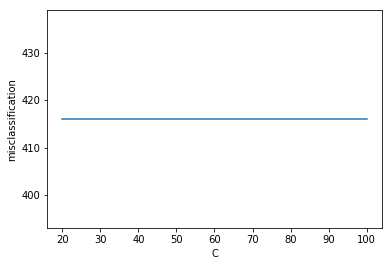

best score: 0.958400
This parameter "C" do not have too much effect on the result.
best parameters:
kernel 100.0
This parameter "C" do not have too much effect on the result.
best parameters:
degree 100.0
This parameter "C" do not have too much effect on the result.
best parameters:
C 100.0
test score: 0.965000


In [9]:
# Test the 'C'
parameters = {'kernel':['poly'],
              'degree':[2],
              'C':[20.0,40.0,60.0,80.0,100.0]}
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, y_train)
result = clf_new.best_estimator_

X = [parameters['C'][i] for i in range(5)]
Y = [(1 - clf_new.cv_results_['mean_test_score'][i]) * len(X_train) for i in range(5)]

# Show the test process
plt.plot(X,Y)
plt.xlabel('C')
plt.ylabel('misclassification')
plt.show()

print('best score: %f'%clf_new.best_score_)
for key in parameters.keys():
    temp = Y[0]
    for i in range(len(Y)-1):
        if Y[i] != Y[i+1]:
            temp = Y[i+1]
    if temp != Y[0]:
        print('best parameters:')
        print(key, result.get_params()[key])
    else:
        print('This parameter "C" do not have too much effect on the result.')
        print('best parameters:')
        print(key,X[-1])
print('test score: %f'%result.score(X_test, y_test))

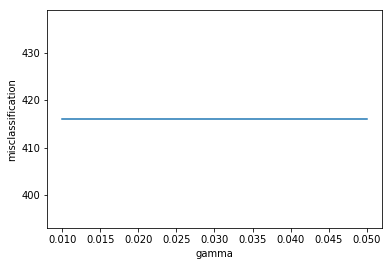

best score: 0.958400
This parameter "gamma" do not have too much effect on the result.
best parameters:
kernel 0.05
This parameter "gamma" do not have too much effect on the result.
best parameters:
degree 0.05
This parameter "gamma" do not have too much effect on the result.
best parameters:
C 0.05
This parameter "gamma" do not have too much effect on the result.
best parameters:
gamma 0.05
test score: 0.965000


In [11]:
# Test the 'gamma'
parameters = {'kernel':['poly'],
              'degree':[2],
              'C':[100.0],
              'gamma':[0.01,0.02,0.03,0.04,0.05]}
scoring_fnc = make_scorer(accuracy_score)
kf = KFold(n_splits=5)
clf_new = GridSearchCV(clf, parameters, scoring_fnc, cv=kf)
clf_new = clf_new.fit(X_train, y_train)
result = clf_new.best_estimator_

X = [parameters['gamma'][i] for i in range(5)]
Y = [(1 - clf_new.cv_results_['mean_test_score'][i]) * len(X_train) for i in range(5)]

# Show the test process
plt.plot(X,Y)
plt.xlabel('gamma')
plt.ylabel('misclassification')
plt.show()

print('best score: %f'%clf_new.best_score_)
for key in parameters.keys():
    temp = Y[0]
    for i in range(len(Y)-1):
        if Y[i] != Y[i+1]:
            temp = Y[i+1]
    if temp != Y[0]:
        print('best parameters:')
        print(key, result.get_params()[key])
    else:
        print('This parameter "gamma" do not have too much effect on the result.')
        print('best parameters:')
        print(key,X[-1])
print('test score: %f'%result.score(X_test, y_test))

# Test the final model

In [18]:
# create model
y_test = np.array(y_test)
X_test = np.array(X_test)
# Test the 10 numbers respectively
def test_SVM():
    clf = SVC(C=100.0, kernel='poly', degree = 2,gamma=0.03)
    clf.fit(X_train,y_train)
    tcName = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    tst = time.clock()
    allErrCount = 0
    allErrorRate = 0.0
    allScore = 0.0
    for tcn  in tcName:
        index = np.where(y_test == tcn)
        tdataMat = X_test[index]
        tdataLabel = y_test[index]
        print("test dataMat shape: ",tdataMat.shape,"test dataLabel len: ",len(tdataLabel))
        #print("test dataLabel: {}".format(len(tdataLabel)))
        pre_st = time.clock()
        preResult = clf.predict(tdataMat)
        pre_et = time.clock()
        print("Recognition",tcn,"spent",'%.4fs' % (pre_et-pre_st))
        #print("predict result: {}".format(len(preResult)))
        errCount = len([x for x in preResult if x!=tcn])
        print("errorCount:",errCount)
        allErrCount += errCount
        score_st = time.clock()
        score = clf.score(tdataMat, tdataLabel)
        score_et = time.clock()
        print("computing score spent",'%.4fs' %(score_et-score_st))
        allScore += score
        print("score:",'%.6f' %score)
        print("error rate is",'%.6f' %(1-score))
        print("---------------------------------------------------------")


    tet = time.clock()
    print("Testing All class total spent",'%.6fs' %(tet-tst))
    print("All error Count is:",allErrCount)
    avgAccuracy = allScore/10.0
    print("Average accuracy is:",'%.6f' %avgAccuracy)
    print("Average error rate is:",'%.6f' % (1-avgAccuracy))


test_SVM()

test dataMat shape:  (200, 784) test dataLabel len:  200
Recognition 0 spent 0.5385s
errorCount: 0
computing score spent 0.5094s
score: 1.000000
error rate is 0.000000
---------------------------------------------------------
test dataMat shape:  (200, 784) test dataLabel len:  200
Recognition 1 spent 0.5090s
errorCount: 5
computing score spent 0.6144s
score: 0.975000
error rate is 0.025000
---------------------------------------------------------
test dataMat shape:  (200, 784) test dataLabel len:  200
Recognition 2 spent 0.5043s
errorCount: 8
computing score spent 0.5125s
score: 0.960000
error rate is 0.040000
---------------------------------------------------------
test dataMat shape:  (200, 784) test dataLabel len:  200
Recognition 3 spent 0.5038s
errorCount: 9
computing score spent 0.5060s
score: 0.955000
error rate is 0.045000
---------------------------------------------------------
test dataMat shape:  (200, 784) test dataLabel len:  200
Recognition 4 spent 0.5049s
errorCount: